# Import Modules
You may need to install some of them.

In [2]:
using Revise, DeconvOptim, TestImages, Colors, Noise, ImageShow

# custom image views
imshow_m(args...) = imshow(cat(args..., dims=3))
h_view(args...) = begin
    img = cat(args..., dims=2)
    img ./= maximum(img)
    Gray.(img)
end

h_view (generic function with 1 method)

# Prepare Noisy Image and PSF

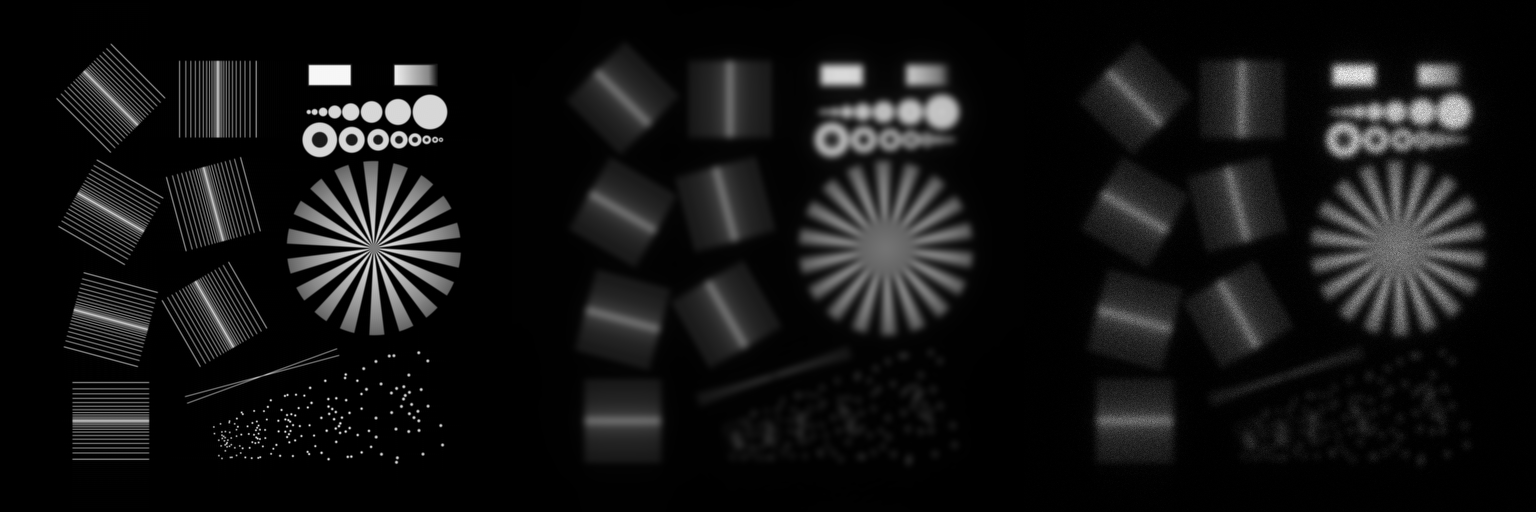

In [3]:
# load test images
img = Float32.(testimage("resolution_test_512"))

psf = Float32.(generate_psf(size(img), 30))

# create a blurred, noisy version of that image
img_b = conv(img, psf, [1, 2])
img_n = poisson(img_b, 300);

reg = GR()

h_view(img, img_b, img_n)

# Changing the loss function

  0.291797 seconds (8.66 M allocations: 611.692 MiB, 5.67% gc time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     5.320349e+04

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 4.65e-02 ≰ 0.0e+00
    |x - x'|/|x'|          = 4.13e-02 ≰ 0.0e+00
    |f(x) - f(x')|         = 9.73e-01 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.83e-05 ≰ 0.0e+00
    |g(x)|                 = 4.69e-02 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    10
    f(x) calls:    16
    ∇f(x) calls:   11

  0.510348 seconds (8.67 M allocations: 648.435 MiB, 39.37% gc time, 2.84% compilation time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     1.214692e+02

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 1.67e-01 ≰ 0.0e+00
    |x - x'|/|x'|      

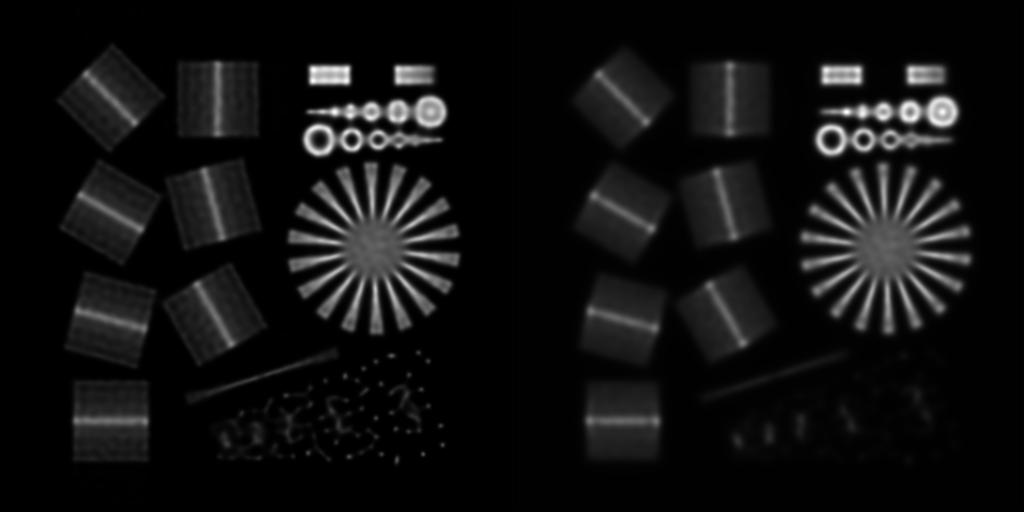

In [6]:
@time resP, optim_res = deconvolution(img_n, psf, loss=Poisson(), regularizer=reg, iterations=10)
@show optim_res

@time resG, optim_res = deconvolution(img_n, psf, loss=Gauss(), regularizer=reg, iterations=10)
@show optim_res

h_view(resP, resG)